### Data

In [1]:
%store -r shots

df, window_size = shots['df'], shots['window_size']
sideways = df.T

X, Y = np.array(sideways['dist0':'theta{}'.format(window_size-1)]), np.array(sideways.ix['label']).astype(int)

### Plots

/home/ebanner/.anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  app.launch_new_instance()
/home/ebanner/.anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


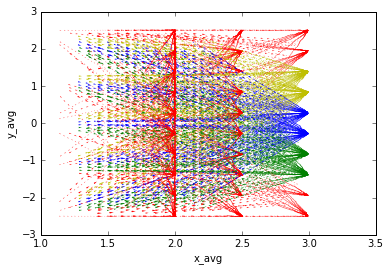

In [2]:
colormap = np.array(['r', 'g', 'b', 'y'])
labels = df['label']
axes = df.plot(kind='scatter', x='x_avg', y='y_avg', c=colormap[labels], s=0)
axes.quiver(df['x_avg'], df['y_avg'], df['dx_avg'], df['dy_avg'], color=colormap[labels], scale_units='xy', angles='xy', scale=2.5, headwidth=2)

### Load Model

In [3]:
import pickle

with open('/home/ebanner/nao/trunk/core/python/behaviors/distance_bearing-nn.py', 'rb') as f:
    model = pickle.load(f)

### Plot

/home/ebanner/.anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
/home/ebanner/.anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
/home/ebanner/.anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/ebanner/.anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


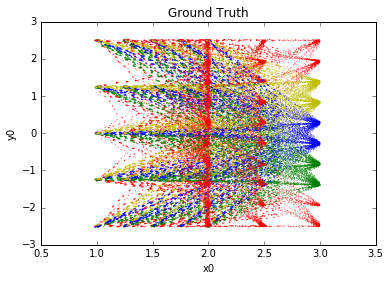

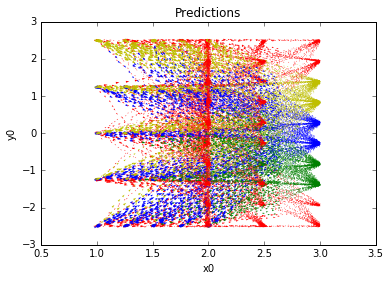

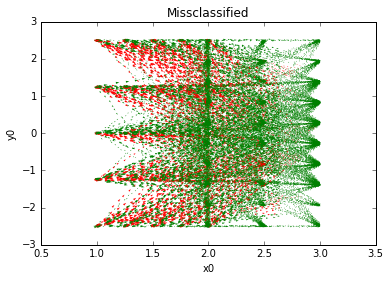

In [4]:
nn = model['clf']

# Plot the gold standard in a plot right next to it
axes = df.plot(kind='scatter', x='x0', y='y0', c=colormap[df['label']], title='Ground Truth', s=0)
axes.quiver(df['x0'], df['y0'], df['dx0'], df['dy0'], color=colormap[df['label']], scale_units='xy', angles='xy', scale=2.5, width=.0022)

# Predictions
scores, predictions = nn.predict(X)
df['predictions'] = predictions
axes = df.plot(kind='scatter', x='x0', y='y0', c=colormap[df['predictions']], title='Predictions', s=0)
plt.quiver(df['x0'], df['y0'], df['dx0'], df['dy0'], color=colormap[df['predictions']], scale_units='xy', angles='xy', scale=2.5, width=.0022)

# Misclassified examples
df['correct'] = df['label'] == df['predictions']
axes = df.plot(kind='scatter', x='x0', y='y0', c=colormap[df['correct']], title='Missclassified', s=0)
q = axes.quiver(df['x0'], df['y0'], df['dx0'], df['dy0'], color=colormap[df['correct']], scale_units='xy', angles='xy', scale=2.5, width=.0022)

### Raw Accuracy

In [5]:
df['correct'].sum().astype(float) / len(df)

0.88415015257913898

### Shot Accuracy

In [6]:
df['predict_shot'] = (df.predictions == 1) | (df.predictions == 2) | (df.predictions == 3)
df['label_shot'] = (df.label == 1) | (df.label == 2) | (df.label == 3)
df['correct_shot'] = df.predict_shot == df.label_shot

df['correct_shot'].sum().astype(float) / len(df)

0.94036545461230192